In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data3.csv')

In [3]:
df.shape

(64, 2)

In [4]:
df.columns

Index(['Period', 'Sales_quantity'], dtype='object')

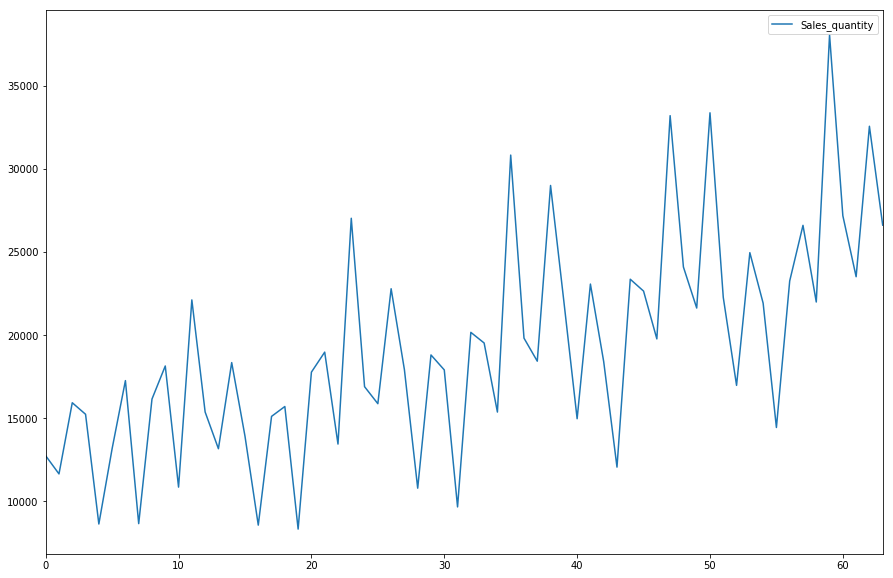

In [5]:
df.plot(figsize=(15,10))

In [6]:
train = df[0:55].copy()
test = df[55:].copy()

## Exercises:

Create the Naive, TrendNaive and Seasonal Naive algorithm.

* Naive: $Y_t = Y_{t-1}$
* Trend: $Y_t = Y_{t-1} - Y_{t-2}$
* Seasonal: $Y_T = Y_{t-lag}$

Steps:

- Create algorithm
- Predict the test set
- Validate using mean absolute error


### Naive

In [7]:
Y_t = train.loc[54].Sales_quantity

In [8]:
test['pred'] = Y_t

In [9]:
mean_absolute_error(test['pred'], test['Sales_quantity'])

5771.0

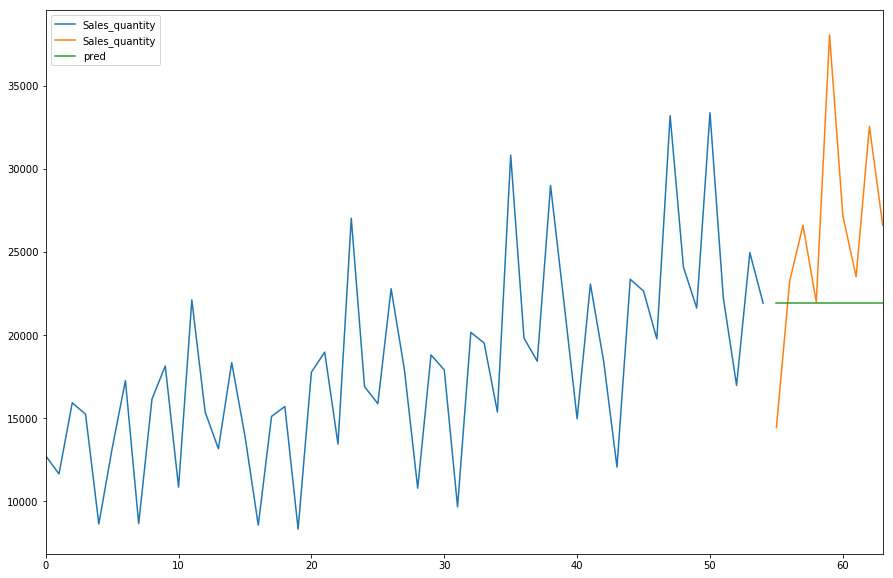

In [12]:
ax = train.plot(figsize=(15,10))
test.plot(ax=ax)

###  Trend naive

In [15]:
t_min2 = train.loc[len(train)-2].Sales_quantity

In [16]:
t_min1 = train.loc[len(train)-1].Sales_quantity

In [19]:
print(t_min1)
print(t_min2)

21917.0
24958.0


In [26]:
test['pred'] = 0

In [27]:
test.loc[55, 'pred'] = Y_t.copy()

In [28]:
trend = t_min1 - t_min2

In [29]:
trend

-3041.0

In [30]:
for i in test.index:
    if i == 55:
        continue
    print(i)
    test.loc[i, 'pred'] = test.loc[i-1].pred + trend

56
57
58
59
60
61
62
63


In [31]:
len(test.index)

9

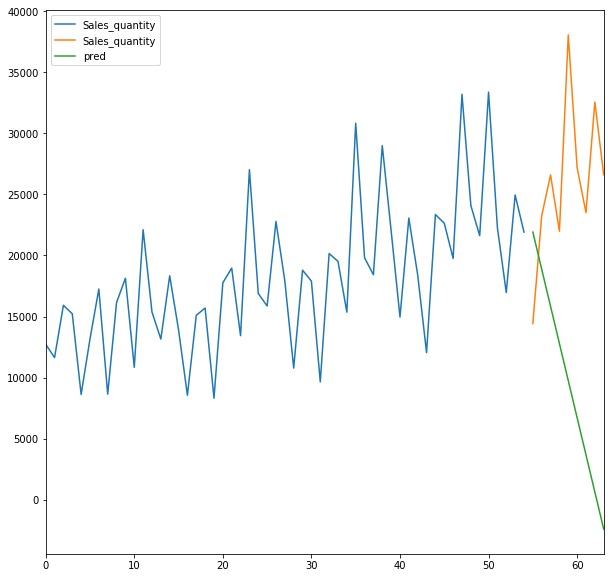

In [32]:
ax = train.plot(figsize=(10,10))
test.plot(ax=ax)

In [33]:
mean_absolute_error(test['pred'], test['Sales_quantity'])

17935.0

### Seasonal Naive

In [34]:
def add_seasonal_naive(lag):
    for i in test.index:
        if i - lag < test.index[0]:
            test.loc[i, 'pred'] = train.loc[i-lag].Sales_quantity
        else:
            test.loc[i, 'pred'] = test.loc[i-lag].pred

In [42]:
test['pred'] = 0 
add_seasonal_naive(3)

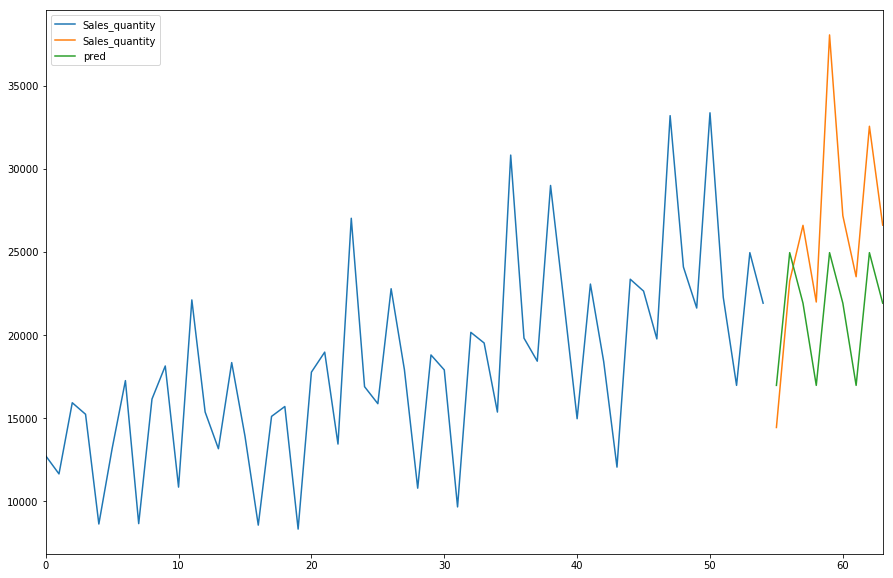

In [43]:
ax = train.plot(figsize=(15,10))
test.plot(ax=ax)

In [44]:
mean_absolute_error(test['pred'], test['Sales_quantity'])

5686.222222222223